## 1. 대학 데이터셋을 사용해 소수 인종이 다수인 주 찾기

In [45]:
import pandas as pd
import numpy as np

In [12]:
college = pd.read_csv('data/college.csv', index_col='INSTNM')
college

,CITY,STABBR,HBCU,MENONLY,WOMENONLY,RELAFFIL,SATVRMID,SATMTMID,DISTANCEONLY,UGDS,...,UGDS_2MOR,UGDS_NRA,UGDS_UNKN,PPTUG_EF,CURROPER,PCTPELL,PCTFLOAN,UG25ABV,MD_EARN_WNE_P10,GRAD_DEBT_MDN_SUPP
INSTNM,,,,,,,,,,,,,,,,,,,,,
Alabama A & M University,Normal,AL,1.0,0.0,0.0,0,424.0,420.0,0.0,4206.0,...,0.0000,0.0059,0.0138,0.0656,1,0.7356,0.8284,0.1049,30300,33888
University of Alabama at Birmingham,Birmingham,AL,0.0,0.0,0.0,0,570.0,565.0,0.0,11383.0,...,0.0368,0.0179,0.0100,0.2607,1,0.3460,0.5214,0.2422,39700,21941.5
Amridge University,Montgomery,AL,0.0,0.0,0.0,1,NaN,NaN,1.0,291.0,...,0.0000,0.0000,0.2715,0.4536,1,0.6801,0.7795,0.8540,40100,23370
University of Alabama in Huntsville,Huntsville,AL,0.0,0.0,0.0,0,595.0,590.0,0.0,5451.0,...,0.0172,0.0332,0.0350,0.2146,1,0.3072,0.4596,0.2640,45500,24097
Alabama State University,Montgomery,AL,1.0,0.0,0.0,0,425.0,430.0,0.0,4811.0,...,0.0098,0.0243,0.0137,0.0892,1,0.7347,0.7554,0.1270,26600,33118.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SAE Institute of Technology San Francisco,Emeryville,CA,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,9500
Rasmussen College - Overland Park,Overland Park,KS,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,21163
National Personal Training Institute of Cleveland,Highland Heights,OH,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,6333


In [13]:
grouped = college.groupby('STABBR')

In [30]:
def check_m(df, threshold):
    m_pct = 1 - df['UGDS_WHITE']  # 백인 학생이 아닌 학생 비율
    total_m = (df['UGDS'] * m_pct).sum()  # 백인아닌 학생 수
    total_ugds = df['UGDS'].sum()  # 전체 학생 수
    total_m_pct = total_m / total_ugds  # 백인아닌 학생 비율
    return total_m_pct > threshold

In [32]:
c_filter = grouped.filter(check_m, threshold=0.5)
c_filter.head()

,CITY,STABBR,HBCU,MENONLY,WOMENONLY,RELAFFIL,SATVRMID,SATMTMID,DISTANCEONLY,UGDS,...,UGDS_2MOR,UGDS_NRA,UGDS_UNKN,PPTUG_EF,CURROPER,PCTPELL,PCTFLOAN,UG25ABV,MD_EARN_WNE_P10,GRAD_DEBT_MDN_SUPP
INSTNM,,,,,,,,,,,,,,,,,,,,,
Everest College-Phoenix,Phoenix,AZ,0.0,0.0,0.0,1,NaN,NaN,0.0,4102.0,...,0.0373,0.0,0.1026,0.4749,0,0.8291,0.7151,0.6700,28600,9500
Collins College,Phoenix,AZ,0.0,0.0,0.0,0,NaN,NaN,0.0,83.0,...,0.0241,0.0,0.3855,0.3373,0,0.7205,0.8228,0.4764,25700,47000
Empire Beauty School-Paradise Valley,Phoenix,AZ,0.0,0.0,0.0,1,NaN,NaN,0.0,25.0,...,0.0400,0.0,0.0000,0.1600,0,0.6349,0.5873,0.4651,17800,9588
Empire Beauty School-Tucson,Tucson,AZ,0.0,0.0,0.0,0,NaN,NaN,0.0,126.0,...,0.0000,0.0,0.0079,0.2222,1,0.7962,0.6615,0.4229,18200,9833
Thunderbird School of Global Management,Glendale,AZ,0.0,0.0,0.0,0,NaN,NaN,0.0,1.0,...,0.0000,0.0,0.0000,1.0000,0,0.0000,0.0000,0.0000,118900,PrivacySuppressed


In [33]:
college.shape

(7535, 26)

In [34]:
c_filter.shape

(3028, 26)

In [35]:
c_filter['STABBR'].nunique()

20

## 2. 체중 감량 내기의 승자 찾기

In [46]:
weight_loss = pd.read_csv('data/weight_loss.csv')
weight_loss

,Name,Month,Week,Weight
0,Bob,Jan,Week 1,291
1,Amy,Jan,Week 1,197
2,Bob,Jan,Week 2,288
3,Amy,Jan,Week 2,189
4,Bob,Jan,Week 3,283
5,Amy,Jan,Week 3,189
6,Bob,Jan,Week 4,283
7,Amy,Jan,Week 4,190
8,Bob,Feb,Week 1,283
9,Amy,Feb,Week 1,190


In [38]:
weight_loss.query("Month == 'Jan'")

,Name,Month,Week,Weight
0,Bob,Jan,Week 1,291
1,Amy,Jan,Week 1,197
2,Bob,Jan,Week 2,288
3,Amy,Jan,Week 2,189
4,Bob,Jan,Week 3,283
5,Amy,Jan,Week 3,189
6,Bob,Jan,Week 4,283
7,Amy,Jan,Week 4,190


In [51]:
# 무게감량 구하기
# (현재무게 - 처음무게)/처음무게
def find_perc_loss(s):
    return (s - s.iloc[0]) / s.iloc[0] 

In [40]:
bob_jan = weight_loss.query("Name=='Bob' and Month=='Jan'")
bob_jan.head()

,Name,Month,Week,Weight
0,Bob,Jan,Week 1,291
2,Bob,Jan,Week 2,288
4,Bob,Jan,Week 3,283
6,Bob,Jan,Week 4,283


In [41]:
bob_jan['Weight'].iloc[0]

291

In [42]:
find_perc_loss(bob_jan['Weight'])

0    0.000000
2   -0.010309
4   -0.027491
6   -0.027491
Name: Weight, dtype: float64

In [49]:
pcnt_loss = (weight_loss['Weight'] - weight_loss['Weight'].iloc[0])/weight_loss['Weight'].iloc[0]

In [50]:
#pcnt_loss = weight_loss.groupby(['Name','Month'])['Weight'].transform(find_perc_loss)
pcnt_loss.head()

0    0.000000
1   -0.323024
2   -0.010309
3   -0.350515
4   -0.027491
Name: Weight, dtype: float64

In [52]:
weight_loss['Perc Weight Loss'] = pcnt_loss

In [53]:
weight_loss

,Name,Month,Week,Weight,Perc Weight Loss
0,Bob,Jan,Week 1,291,0.000000
1,Amy,Jan,Week 1,197,-0.323024
2,Bob,Jan,Week 2,288,-0.010309
3,Amy,Jan,Week 2,189,-0.350515
4,Bob,Jan,Week 3,283,-0.027491
5,Amy,Jan,Week 3,189,-0.350515
6,Bob,Jan,Week 4,283,-0.027491
7,Amy,Jan,Week 4,190,-0.347079
8,Bob,Feb,Week 1,283,-0.027491
9,Amy,Feb,Week 1,190,-0.347079


In [21]:
weight_loss.query("Name=='Bob' and Month in ['Jan','Feb']")

,Name,Month,Week,Weight,Perc Weight Loss
0,Bob,Jan,Week 1,291,0.000000
2,Bob,Jan,Week 2,288,-0.010309
4,Bob,Jan,Week 3,283,-0.027491
6,Bob,Jan,Week 4,283,-0.027491
8,Bob,Feb,Week 1,283,0.000000
10,Bob,Feb,Week 2,275,-0.028269
12,Bob,Feb,Week 3,268,-0.053004
14,Bob,Feb,Week 4,268,-0.053004


In [22]:
week4 = weight_loss.query('Week == "Week 4"')
week4

,Name,Month,Week,Weight,Perc Weight Loss
6,Bob,Jan,Week 4,283,-0.027491
7,Amy,Jan,Week 4,190,-0.035533
14,Bob,Feb,Week 4,268,-0.053004
15,Amy,Feb,Week 4,173,-0.089474
22,Bob,Mar,Week 4,261,-0.026119
23,Amy,Mar,Week 4,170,-0.017341
30,Bob,Apr,Week 4,250,-0.042146
31,Amy,Apr,Week 4,161,-0.052941


In [23]:
winner = week4.pivot(index='Month', columns='Name', values='Perc Weight Loss')
winner

Name,Amy,Bob
Month,,
Apr,-0.052941,-0.042146
Feb,-0.089474,-0.053004
Jan,-0.035533,-0.027491
Mar,-0.017341,-0.026119


In [24]:
# np.where :  조건에 맞는 값을 특정 다른 값으로 변환하기
# np.where(조건, 조건에 맞을 때 값, 조건과 다를 때 값)
x = np.array([5, 4, 3, 2, 1, 0])
np.where(x >= 3, 3, x)

array([3, 3, 3, 2, 1, 0])

In [25]:
winner['Winner'] = np.where(winner['Amy']<winner['Bob'], 'Amy','Bob')

In [26]:
winner['Winner']

Month
Apr    Amy
Feb    Amy
Jan    Amy
Mar    Bob
Name: Winner, dtype: object

In [36]:
winner.style.highlight_min(axis=1,color='blue')

Name,Amy,Bob,Winner
Month,,,
Apr,-0.052941,-0.042146,Amy
Feb,-0.089474,-0.053004,Amy
Jan,-0.035533,-0.027491,Amy
Mar,-0.017341,-0.026119,Bob


In [28]:
winner.Winner.value_counts()

Amy    3
Bob    1
Name: Winner, dtype: int64

## 3. 주별 가중 평균 SAT 점수 계산

In [29]:
college.head()

,CITY,STABBR,HBCU,MENONLY,WOMENONLY,RELAFFIL,SATVRMID,SATMTMID,DISTANCEONLY,UGDS,...,UGDS_2MOR,UGDS_NRA,UGDS_UNKN,PPTUG_EF,CURROPER,PCTPELL,PCTFLOAN,UG25ABV,MD_EARN_WNE_P10,GRAD_DEBT_MDN_SUPP
INSTNM,,,,,,,,,,,,,,,,,,,,,
Alabama A & M University,Normal,AL,1.0,0.0,0.0,0,424.0,420.0,0.0,4206.0,...,0.0000,0.0059,0.0138,0.0656,1,0.7356,0.8284,0.1049,30300,33888
University of Alabama at Birmingham,Birmingham,AL,0.0,0.0,0.0,0,570.0,565.0,0.0,11383.0,...,0.0368,0.0179,0.0100,0.2607,1,0.3460,0.5214,0.2422,39700,21941.5
Amridge University,Montgomery,AL,0.0,0.0,0.0,1,NaN,NaN,1.0,291.0,...,0.0000,0.0000,0.2715,0.4536,1,0.6801,0.7795,0.8540,40100,23370
University of Alabama in Huntsville,Huntsville,AL,0.0,0.0,0.0,0,595.0,590.0,0.0,5451.0,...,0.0172,0.0332,0.0350,0.2146,1,0.3072,0.4596,0.2640,45500,24097
Alabama State University,Montgomery,AL,1.0,0.0,0.0,0,425.0,430.0,0.0,4811.0,...,0.0098,0.0243,0.0137,0.0892,1,0.7347,0.7554,0.1270,26600,33118.5


In [30]:
# 아래에서 5개 볼때
college.tail()

,CITY,STABBR,HBCU,MENONLY,WOMENONLY,RELAFFIL,SATVRMID,SATMTMID,DISTANCEONLY,UGDS,...,UGDS_2MOR,UGDS_NRA,UGDS_UNKN,PPTUG_EF,CURROPER,PCTPELL,PCTFLOAN,UG25ABV,MD_EARN_WNE_P10,GRAD_DEBT_MDN_SUPP
INSTNM,,,,,,,,,,,,,,,,,,,,,
SAE Institute of Technology San Francisco,Emeryville,CA,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,9500
Rasmussen College - Overland Park,Overland Park,KS,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,21163
National Personal Training Institute of Cleveland,Highland Heights,OH,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,6333
Bay Area Medical Academy - San Jose Satellite Location,San Jose,CA,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,PrivacySuppressed
Excel Learning Center-San Antonio South,San Antonio,TX,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,12125


In [31]:
subset = ['UGDS', 'SATMTMID']
college2 = college.dropna(subset=subset)

In [33]:
college2.tail()

,CITY,STABBR,HBCU,MENONLY,WOMENONLY,RELAFFIL,SATVRMID,SATMTMID,DISTANCEONLY,UGDS,...,UGDS_2MOR,UGDS_NRA,UGDS_UNKN,PPTUG_EF,CURROPER,PCTPELL,PCTFLOAN,UG25ABV,MD_EARN_WNE_P10,GRAD_DEBT_MDN_SUPP
INSTNM,,,,,,,,,,,,,,,,,,,,,
Pennsylvania State University-World Campus,University Park,PA,0.0,0.0,0.0,0,510.0,505.0,1.0,5736.0,...,0.0282,0.0115,0.0328,0.6968,1,0.3526,0.5641,0.7903,47700,27000
Augusta University,Augusta,GA,0.0,0.0,0.0,0,515.0,515.0,0.0,5030.0,...,0.0527,0.0115,0.0221,0.1944,1,0.4340,0.5458,0.2713,NaN,12350
University of North Georgia,Dahlonega,GA,0.0,0.0,0.0,0,515.0,505.0,0.0,14976.0,...,0.0266,0.0142,0.0126,0.2900,1,0.3751,0.4028,0.1623,NaN,15000
University of Florida-Online,Gainesville,FL,0.0,0.0,0.0,0,580.0,585.0,1.0,879.0,...,0.0023,0.0046,0.0444,0.6155,1,NaN,NaN,NaN,NaN,15000
University of North Texas at Dallas,Dallas,TX,0.0,0.0,0.0,0,430.0,465.0,0.0,1623.0,...,0.0142,0.0129,0.0129,0.4060,1,0.4813,0.4791,NaN,NaN,20000


In [34]:
college.shape, college2.shape

((7535, 26), (1196, 26))

In [35]:
# UGDS : 학부생 수, SATMTMID : SAT 수학 점수 중앙값
def weight_math_average(df): # 수학평균
    weight_math = df['UGDS'] * df['SATMTMID']
    return int(weight_math.sum() / df['UGDS'].sum())

In [36]:
# STABBR : 대학이 위치한 주(state)명
# apply :  각 열(또는 행)을 반복하여 함수를 적용
college.groupby('STABBR').apply(weight_math_average).head()

STABBR
AK      5
AL    261
AR    301
AS      0
AZ     61
dtype: int64

# 객체 합치기

## 1. concat

### 1.1. Multiple Data Loading

In [37]:
df1 = pd.read_csv('data/stocks_2016.csv')
df1

,Symbol,Shares,Low,High
0,AAPL,80,95,110
1,TSLA,50,80,130
2,WMT,40,55,70


In [38]:
df2 = pd.read_csv('data/stocks_2017.csv')
df2

,Symbol,Shares,Low,High
0,AAPL,50,120,140
1,GE,100,30,40
2,IBM,87,75,95
3,SLB,20,55,85
4,TXN,500,15,23
5,TSLA,100,100,300


In [39]:
df3 = pd.read_csv('data/stocks_2018.csv')
df3

,Symbol,Shares,Low,High
0,AAPL,40,135,170
1,AMZN,8,900,1125
2,TSLA,50,220,400


In [40]:
years = 2016, 2017, 2018
type(years)

tuple

In [41]:
stock_tables = [pd.read_csv('data/stocks_{}.csv'.format(year), index_col='Symbol') for year in years]
stock_tables

[        Shares  Low  High
 Symbol                   
 AAPL        80   95   110
 TSLA        50   80   130
 WMT         40   55    70,         Shares  Low  High
 Symbol                   
 AAPL        50  120   140
 GE         100   30    40
 IBM         87   75    95
 SLB         20   55    85
 TXN        500   15    23
 TSLA       100  100   300,         Shares  Low  High
 Symbol                   
 AAPL        40  135   170
 AMZN         8  900  1125
 TSLA        50  220   400]

In [45]:
s_2016, s_2017, s_2018 = stock_tables
s_2017

,Shares,Low,High
Symbol,,,
AAPL,50,120,140
GE,100,30,40
IBM,87,75,95
SLB,20,55,85
TXN,500,15,23
TSLA,100,100,300


### 1.2. 수직 병합

In [46]:
pd.concat(stock_tables)

,Shares,Low,High
Symbol,,,
AAPL,80,95,110
TSLA,50,80,130
WMT,40,55,70
AAPL,50,120,140
GE,100,30,40
IBM,87,75,95
SLB,20,55,85
TXN,500,15,23
TSLA,100,100,300


In [47]:
pd.concat(stock_tables, keys=[2016, 2017, 2018])

Shares  Low  High
     Symbol                   
2016 AAPL        80   95   110
     TSLA        50   80   130
     WMT         40   55    70
2017 AAPL        50  120   140
     GE         100   30    40
     IBM         87   75    95
     SLB         20   55    85
     TXN        500   15    23
     TSLA       100  100   300
2018 AAPL        40  135   170
     AMZN         8  900  1125
     TSLA        50  220   400

### 1.3. 수평 병합

In [48]:
pd.concat(stock_tables, axis='columns')

/Users/HumanRevolution/.pyenv/versions/anaconda3-2019.10/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


,Shares,Low,High,Shares,Low,High,Shares,Low,High
AAPL,80.0,95.0,110.0,50.0,120.0,140.0,40.0,135.0,170.0
AMZN,NaN,NaN,NaN,NaN,NaN,NaN,8.0,900.0,1125.0
GE,NaN,NaN,NaN,100.0,30.0,40.0,NaN,NaN,NaN
IBM,NaN,NaN,NaN,87.0,75.0,95.0,NaN,NaN,NaN
SLB,NaN,NaN,NaN,20.0,55.0,85.0,NaN,NaN,NaN
TSLA,50.0,80.0,130.0,100.0,100.0,300.0,50.0,220.0,400.0
TXN,NaN,NaN,NaN,500.0,15.0,23.0,NaN,NaN,NaN
WMT,40.0,55.0,70.0,NaN,NaN,NaN,NaN,NaN,NaN


In [49]:
# zip 함수는 동일한 갯수의 요소값을 갖는 시퀀스 자료형을 묶어주는 역할
a = [1,2,3,4,5]
b = ['a','b','c','d','e']
 
for x,y in zip (a,b):
  print (x,y)

1 a
2 b
3 c
4 d
5 e


In [50]:
pd.concat(dict(zip(years,stock_tables)), axis='columns')

/Users/HumanRevolution/.pyenv/versions/anaconda3-2019.10/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


2016                2017                 2018               
     Shares   Low   High Shares    Low   High Shares    Low    High
AAPL   80.0  95.0  110.0   50.0  120.0  140.0   40.0  135.0   170.0
AMZN    NaN   NaN    NaN    NaN    NaN    NaN    8.0  900.0  1125.0
GE      NaN   NaN    NaN  100.0   30.0   40.0    NaN    NaN     NaN
IBM     NaN   NaN    NaN   87.0   75.0   95.0    NaN    NaN     NaN
SLB     NaN   NaN    NaN   20.0   55.0   85.0    NaN    NaN     NaN
TSLA   50.0  80.0  130.0  100.0  100.0  300.0   50.0  220.0   400.0
TXN     NaN   NaN    NaN  500.0   15.0   23.0    NaN    NaN     NaN
WMT    40.0  55.0   70.0    NaN    NaN    NaN    NaN    NaN     NaN

## 2. join

In [51]:
# lsuffix : 왼쪽 프레임의 겹치는 열에서 사용할 접미어입니다.
# rsuffix : 오른쪽 프레임의 겹치는 열에서 사용할 접미어입니다.
s_2016.join(s_2017, lsuffix='_2016', rsuffix='_2017')

,Shares_2016,Low_2016,High_2016,Shares_2017,Low_2017,High_2017
Symbol,,,,,,
AAPL,80,95,110,50.0,120.0,140.0
TSLA,50,80,130,100.0,100.0,300.0
WMT,40,55,70,NaN,NaN,NaN


In [52]:
s_2016.join(s_2017, lsuffix='_2016', rsuffix='_2017', how='outer')

,Shares_2016,Low_2016,High_2016,Shares_2017,Low_2017,High_2017
Symbol,,,,,,
AAPL,80.0,95.0,110.0,50.0,120.0,140.0
GE,NaN,NaN,NaN,100.0,30.0,40.0
IBM,NaN,NaN,NaN,87.0,75.0,95.0
SLB,NaN,NaN,NaN,20.0,55.0,85.0
TSLA,50.0,80.0,130.0,100.0,100.0,300.0
TXN,NaN,NaN,NaN,500.0,15.0,23.0
WMT,40.0,55.0,70.0,NaN,NaN,NaN


In [53]:
s_2017.add_suffix('_2017')  # 라벨추가

,Shares_2017,Low_2017,High_2017
Symbol,,,
AAPL,50,120,140
GE,100,30,40
IBM,87,75,95
SLB,20,55,85
TXN,500,15,23
TSLA,100,100,300


In [54]:
other = [s_2017.add_suffix('_2017'), s_2018.add_suffix('_2018')]
s_2016.add_suffix('_2016').join(other, how='outer')

,Shares_2016,Low_2016,High_2016,Shares_2017,Low_2017,High_2017,Shares_2018,Low_2018,High_2018
AAPL,80.0,95.0,110.0,50.0,120.0,140.0,40.0,135.0,170.0
TSLA,50.0,80.0,130.0,100.0,100.0,300.0,50.0,220.0,400.0
WMT,40.0,55.0,70.0,NaN,NaN,NaN,NaN,NaN,NaN
GE,NaN,NaN,NaN,100.0,30.0,40.0,NaN,NaN,NaN
IBM,NaN,NaN,NaN,87.0,75.0,95.0,NaN,NaN,NaN
SLB,NaN,NaN,NaN,20.0,55.0,85.0,NaN,NaN,NaN
TXN,NaN,NaN,NaN,500.0,15.0,23.0,NaN,NaN,NaN
AMZN,NaN,NaN,NaN,NaN,NaN,NaN,8.0,900.0,1125.0


## 3. Merge

In [55]:
s_2016

,Shares,Low,High
Symbol,,,
AAPL,80,95,110
TSLA,50,80,130
WMT,40,55,70


In [56]:
s_2017

,Shares,Low,High
Symbol,,,
AAPL,50,120,140
GE,100,30,40
IBM,87,75,95
SLB,20,55,85
TXN,500,15,23
TSLA,100,100,300


In [57]:
s_2016.merge(s_2017, left_index=True, right_index=True) # 디폴드 값이 how='inner'

,Shares_x,Low_x,High_x,Shares_y,Low_y,High_y
Symbol,,,,,,
AAPL,80,95,110,50,120,140
TSLA,50,80,130,100,100,300


In [60]:
step1 = s_2016.merge(s_2017, left_index=True, right_index=True, how='outer', suffixes=('_2016','_2017'))
step1

,Shares_2016,Low_2016,High_2016,Shares_2017,Low_2017,High_2017
Symbol,,,,,,
AAPL,80.0,95.0,110.0,50.0,120.0,140.0
GE,NaN,NaN,NaN,100.0,30.0,40.0
IBM,NaN,NaN,NaN,87.0,75.0,95.0
SLB,NaN,NaN,NaN,20.0,55.0,85.0
TSLA,50.0,80.0,130.0,100.0,100.0,300.0
TXN,NaN,NaN,NaN,500.0,15.0,23.0
WMT,40.0,55.0,70.0,NaN,NaN,NaN


In [61]:
s_merge = step1.merge(s_2018.add_suffix('_2018'), left_index=True, right_index=True, how='outer')
s_merge

,Shares_2016,Low_2016,High_2016,Shares_2017,Low_2017,High_2017,Shares_2018,Low_2018,High_2018
Symbol,,,,,,,,,
AAPL,80.0,95.0,110.0,50.0,120.0,140.0,40.0,135.0,170.0
AMZN,NaN,NaN,NaN,NaN,NaN,NaN,8.0,900.0,1125.0
GE,NaN,NaN,NaN,100.0,30.0,40.0,NaN,NaN,NaN
IBM,NaN,NaN,NaN,87.0,75.0,95.0,NaN,NaN,NaN
SLB,NaN,NaN,NaN,20.0,55.0,85.0,NaN,NaN,NaN
TSLA,50.0,80.0,130.0,100.0,100.0,300.0,50.0,220.0,400.0
TXN,NaN,NaN,NaN,500.0,15.0,23.0,NaN,NaN,NaN
WMT,40.0,55.0,70.0,NaN,NaN,NaN,NaN,NaN,NaN


## 4. 병합의 활용

In [62]:
names = ['prices', 'transactions']
food_tables = [pd.read_csv('data/food_{}.csv'.format(name)) for name in names]
food_prices, food_tr = food_tables

In [63]:
food_prices

,item,store,price,Date
0,pear,A,0.99,2017
1,pear,B,1.99,2017
2,peach,A,2.99,2017
3,peach,B,3.49,2017
4,banana,A,0.39,2017
5,banana,B,0.49,2017
6,steak,A,5.99,2017
7,steak,B,6.99,2017
8,steak,B,4.99,2015


In [64]:
food_tr

,custid,item,store,quantity
0,1,pear,A,5
1,1,banana,A,10
2,2,steak,B,3
3,2,pear,B,1
4,2,peach,B,2
5,2,steak,B,1
6,2,coconut,B,4


In [65]:
food_tr.merge(food_prices, on=['item','store'])

,custid,item,store,quantity,price,Date
0,1,pear,A,5,0.99,2017
1,1,banana,A,10,0.39,2017
2,2,steak,B,3,6.99,2017
3,2,steak,B,3,4.99,2015
4,2,steak,B,1,6.99,2017
5,2,steak,B,1,4.99,2015
6,2,pear,B,1,1.99,2017
7,2,peach,B,2,3.49,2017


In [66]:
food_tr.merge(food_prices.query('Date==2017'), how='left')

,custid,item,store,quantity,price,Date
0,1,pear,A,5,0.99,2017.0
1,1,banana,A,10,0.39,2017.0
2,2,steak,B,3,6.99,2017.0
3,2,pear,B,1,1.99,2017.0
4,2,peach,B,2,3.49,2017.0
5,2,steak,B,1,6.99,2017.0
6,2,coconut,B,4,NaN,NaN


In [68]:
f_join = food_prices.query('Date==2017').set_index(['item','store'])
f_join

price  Date
item   store             
pear   A       0.99  2017
       B       1.99  2017
peach  A       2.99  2017
       B       3.49  2017
banana A       0.39  2017
       B       0.49  2017
steak  A       5.99  2017
       B       6.99  2017

In [69]:
food_tr.join(f_join, on=['item','store'])

,custid,item,store,quantity,price,Date
0,1,pear,A,5,0.99,2017.0
1,1,banana,A,10,0.39,2017.0
2,2,steak,B,3,6.99,2017.0
3,2,pear,B,1,1.99,2017.0
4,2,peach,B,2,3.49,2017.0
5,2,steak,B,1,6.99,2017.0
6,2,coconut,B,4,NaN,NaN


In [71]:
'''pd.concat([food_tr.set_index(['item','store']), food_prices.set_index(['item','store'])], axis='columns')'''

"pd.concat([food_tr.set_index(['item','store']), food_prices.set_index(['item','store'])], axis='columns')"

In [72]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid', palette='muted')
%matplotlib inline

In [73]:
data = pd.read_csv('data/breast_cancer.csv')

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


**데이터 확인**

In [75]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [74]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
id                         569 non-null int64
diagnosis                  569 non-null object
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non

- ID는 분석대상이 아님
- 목표변수: Diagnosis
- Unnamed: 32 열은 모두 NULL값이므로 제거가 필요

**필요 없는 변수 제거 및 x, y 분할**

In [76]:
col = data.columns
col

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [77]:
del_col = ['Unnamed: 32', 'id', 'diagnosis']
y = data.diagnosis
x = data.drop(del_col, axis=1)
x.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


**데이터 살펴보기**

양성 : 357
음성 : 212


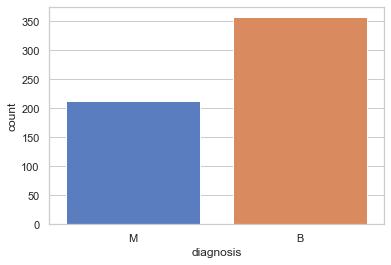

In [78]:
ax = sns.countplot(y, label='count')
B, M = y.value_counts()
print('양성 :', B)
print('음성 :', M)

In [81]:
x.describe().T.head()

,count,mean,std,min,25%,50%,75%,max
radius_mean,569.0,14.127292,3.524049,6.98100,11.70000,13.37000,15.7800,28.1100
texture_mean,569.0,19.289649,4.301036,9.71000,16.17000,18.84000,21.8000,39.2800
perimeter_mean,569.0,91.969033,24.298981,43.79000,75.17000,86.24000,104.1000,188.5000
area_mean,569.0,654.889104,351.914129,143.50000,420.30000,551.10000,782.7000,2501.0000
smoothness_mean,569.0,0.096360,0.014064,0.05263,0.08637,0.09587,0.1053,0.1634


In [86]:
#!pip install pandas_profiling
import pandas_profiling as pp

In [1]:
#pp.ProfileReport(data)

**데이터 시각화-1 : Violinplot**

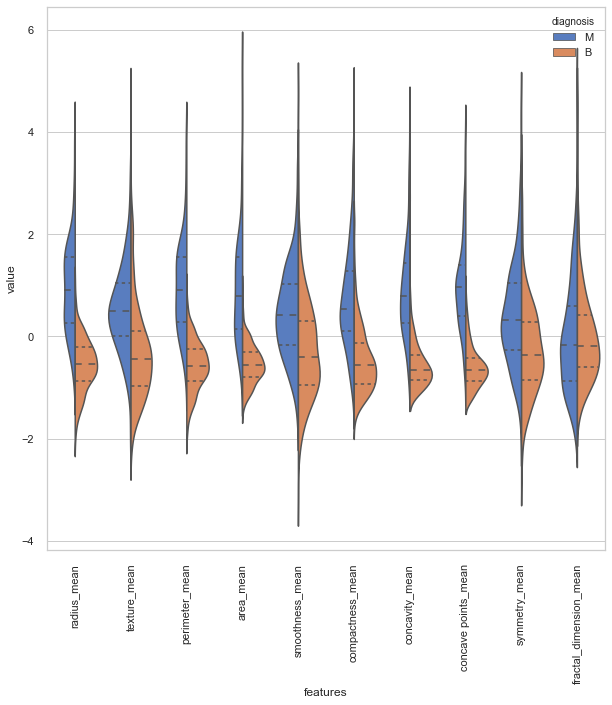

In [84]:
# 확률밀도를 Plotting 하고 중앙의 BoxPlot을 통해 최소값, 25%, 50% 분위, 75% 분위, 최대값
# 을 그려줌으로써 각 데이터 특성을 잘 표현해 준다. 데이터 그룹들 간의 비교를 시각적으로
# 보여준다.
sns.set(style='whitegrid', palette='muted')
graph_data = (x - x.mean()) / (x.std())
graph_data = pd.concat([y, graph_data.iloc[:,0:10]], axis=1)
graph_data = pd.melt(graph_data, id_vars='diagnosis',var_name='features', value_name='value')
plt.figure(figsize=(10,10))
sns.violinplot(x='features', y='value', hue='diagnosis', data=graph_data, split=True, inner='quart')
plt.xticks(rotation=90);

**데이터 시각화-2 : Box Plot**

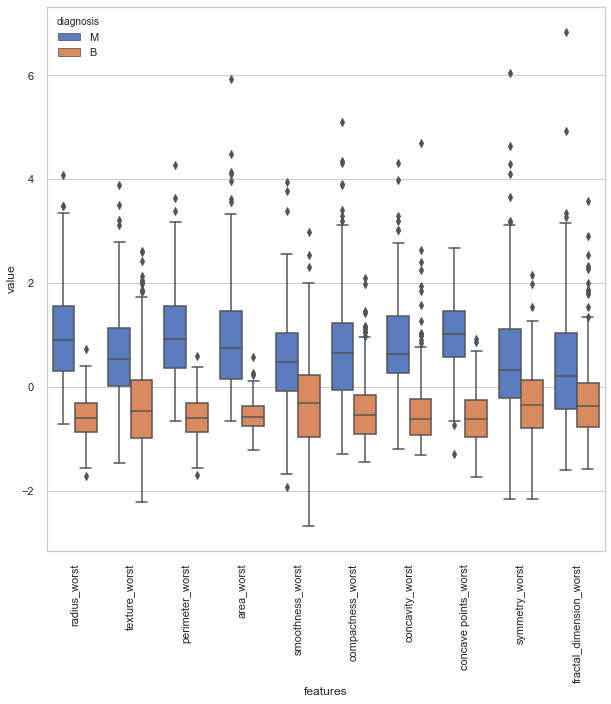

In [85]:
graph_data = (x - x.mean()) / (x.std())
graph_data = pd.concat([y, graph_data.iloc[:,20:31]], axis=1)
graph_data = pd.melt(graph_data, id_vars='diagnosis',var_name='features', value_name='value')
plt.figure(figsize=(10,10))
sns.boxplot(x='features', y='value', hue='diagnosis', data=graph_data)
plt.xticks(rotation=90);

**데이터 시각화-3 : Swarm Plot**

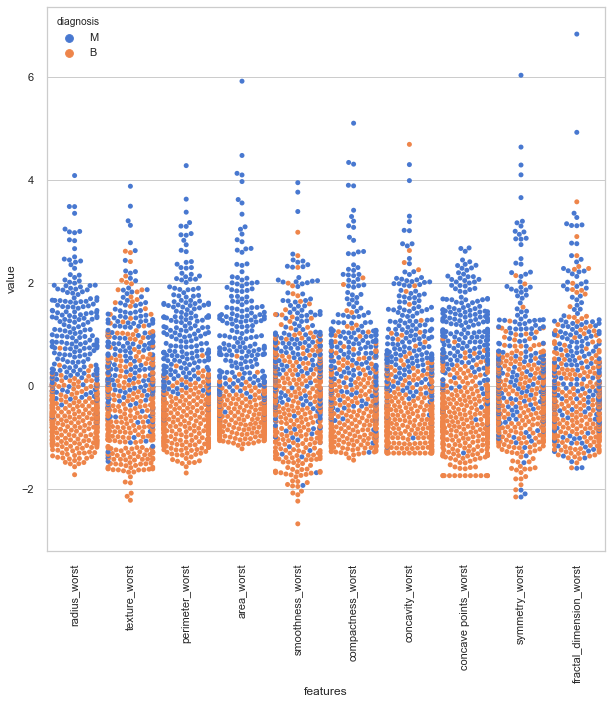

In [87]:
plt.figure(figsize=(10,10))
sns.swarmplot(x='features', y='value', hue='diagnosis', data=graph_data)
plt.xticks(rotation=90);

**변수간 상관관계 파악 1 - 두변수간 상관 관계**

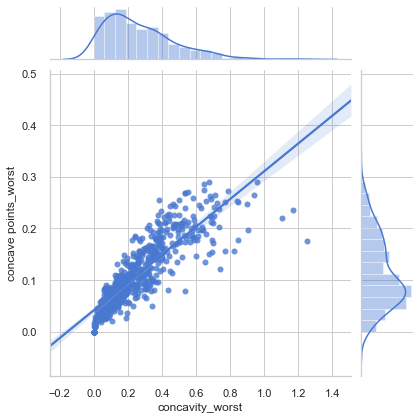

In [88]:
sns.jointplot(x.loc[:, 'concavity_worst'], x.loc[:, 'concave points_worst'], kind='regg');

**변수간 상관관계 파악 2 - 세 변수 이상 상관 관계**

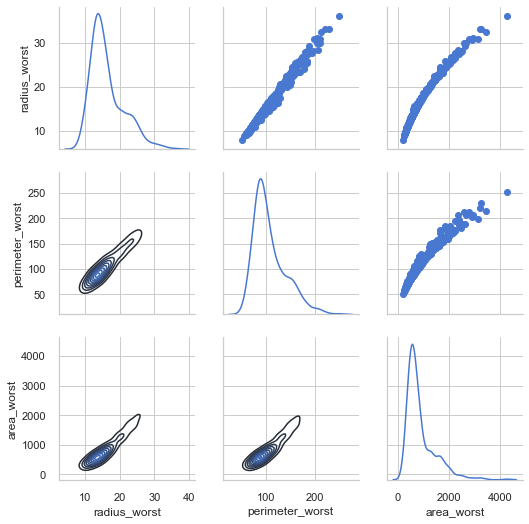

In [89]:
df = x.loc[:, ['radius_worst','perimeter_worst','area_worst']]
g = sns.PairGrid(df, diag_sharey=False)
g.map_lower(sns.kdeplot)
g.map_upper(plt.scatter)
g.map_diag(sns.kdeplot);

**변수간 상관관계 파악 3 - HeatMap**

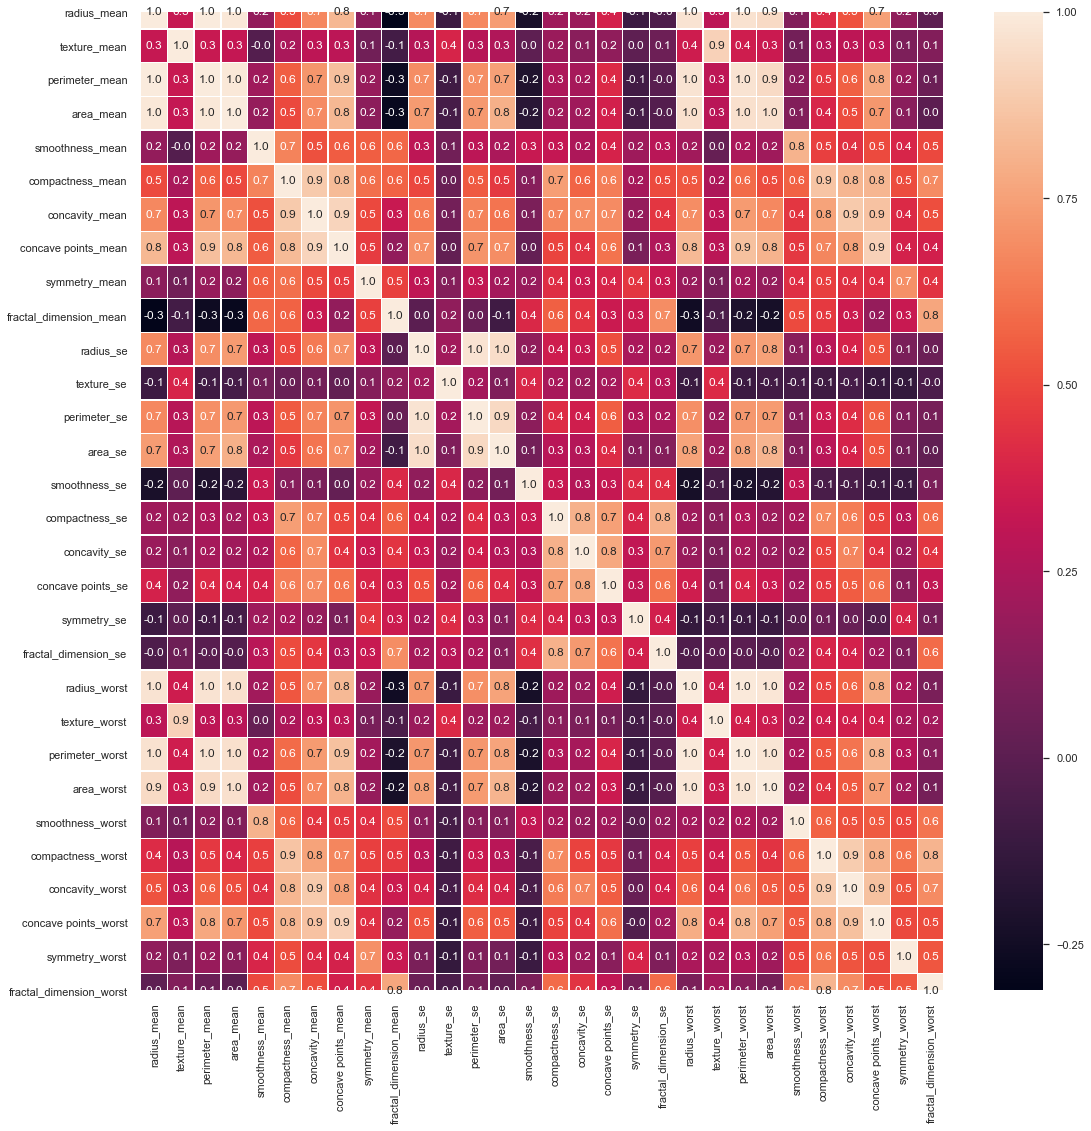

In [90]:
plt.figure(figsize=(18,18))
sns.heatmap(x.corr(), annot=True, linewidth=.5, fmt='.1f');